# Module 4
## Section: Linear Regression

## Lab 1: Introduction to Simple and Multivariate Linear Regression

<br><br><br><br><br><br>
### Why Linear Regression?
***

First, regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.

Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, “how much additional sales income do I get for each additional $1000 spent on marketing?”

Third, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  A typical question is, “what will the price of gold be in 6 months?





<br><br><br>
## Objective
***
* Understand the intuition behind Linear Regression
* Understand the Linear Regression Cost Function
* Understand the Linear Regression using Gradient Descent Algorithm
* Introduction to Linear Regression in sklearn
* Learn about the assumptions in Linear Regression Algorithm
* Evaluating Metrics for Regression

<br><br><br>

## Flow
***

- **Dataset**
- **Predictors and Target Variables?**
    - Predictors & Target for our Dataset
- **Plot our data**
    - Is there a relation ?
    - Plotting a line on a scatter plot
    - Which line to choose ?
- **Linear Regression**
    - Introducing Linear Regression
    - Dependent and Independent Variables
    - Univariate & Multivariate analysis
    - Cost Function
        - Cost Function - Why is it needed ?
        - Cost Function - Mathematical Representation
    - Gradient Descent
        - Gradient Descent - Intuition
        - Gradient Descent - Algorithm
    - Linear Regression in **`sklearn`**
    - Multivariate Linear Regression
    - Measuring Goodness Of Fit


In [1]:
from __future__ import print_function
from __future__ import division

In [2]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
from sklearn.linear_model import LinearRegression

<br><br><br><br><br><br>
## Dataset
***

Let's start by loading the dataset. We'll be using two `.csv` files. One having only one predictor and the other having multiple predictors. Since the target variable(we'll find out what target variables and predictors are below) is **quantitative/continuous**, this is the best for regression problems. 

Let's start loading the data for univariate analysis.


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/house_prices.csv')
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [5]:
data.shape

(1326, 2)

In order to learn to make predictions, it is important to learn what a Predictor is.

<br><br><br><br><br><br>
## Predictor and Target Variables
***

How could you say if a person went to tier 1, 2 or 3 college in America?
 
Simple, if someone is determined to pursue a Bachelor's degree, Higher SAT scores (or GPA) leads to more college admissions! 

### The graph below depicts Cornell's acceptance rate by SAT scores and many Universities show similar trends
***


<img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/LinearRegression.gif" width=400 height=200>

### The graph below depicts that if we keep on drinking more and more beers, our Blood-Alcohol Content(BAC) rises with it. 

<img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/linear_regression2.png" width=400 height=200>

***

The moral of the story is there are factors that influence the outcome of the variable of our interest. 

* SAT score --> University acceptance rate
* Number of beers --> Body alcohol level

These factors are known as **predictors** and the variable of interest is known as the **target variable**.

## Predictors & Target Variable for our dataset

**What could be the predictors for our target variable?**
Let's go with the **LotArea**

We would want to see if the price of a house is really affected by the area of the house.Intuitively, we all know the outcome but let's try to understand why we're doing this.

<br><br><br><br><br><br>
## Plotting our data
***

 - Getting some motivation from **Week-5 Plot With Pandas notebook**, what's intriguing is how this data will look when we plot it 
 - Starting simple, let's just check how our data looks like in a scatter plot where: 
   - Area is taken along the X-axis
   - Price is taken along the Y-axis

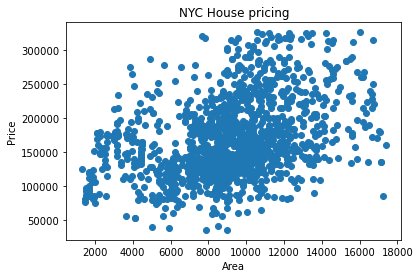

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [7]:
sns.scatterplot(x=data.Lotarean)

AttributeError: 'DataFrame' object has no attribute 'Lotarean'

### Is there a relation ?
*** 

  - By seeing our plot above, we can see an upward trend in the House Prices as the Area of the house increases
  - We can say that as the Area of a house increases, it's price increases too.
<br/>  

Now, let's say we want to predict the price of the house whose area is 14000 sq feet, how should we go about it?

<br><br><br><br><br><br>
### Fitting a Line On the Scatter Plot
***

 - Intuitively, we can just draw a straight line that would "capture" the trend of area and house price, and predict house price from that line.

<div class="alert alert-block alert-success">**Let's try and fit a line through all these points!**</div>

In [ ]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=10000,linewidth='2',color='r')
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<br><br><br>
### Which line to choose?
***

As you saw, there are many lines which would seem to be fitting reasonably well.


consider following lines,


$$ price = 30000 + 15∗area\\
price=10000 + 17 ∗ area\\
price= 50000 + 12 ∗ area
$$

<div class="alert alert-block alert-success">**Let's try and plot them and see if they are a good fit**</div>

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 17*data.LotArea, "r-")
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "b-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


***
Seems like all of them are a good fit for the data. Let's plot all of them in a single plot and see how that pans out.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

As you can see although all three seemed like a good fit, they are quite different from each other. And in the end, they will result in very different predictions.

For example, for house area = 9600, the predictions for red, black and yellow lines are

In [ ]:
# red line: 
print("red line:", 30000 + 15*9600) # <-- Inserted value 9600 inplace of LotArea 

# black line: 
print('black line:', 10000 + 17*9600) # <-- Inserted value 9600 inplace of LotArea

# yellow line:
print('yellow line:', 50000 + 12*9600) # <-- Inserted value 9600 inplace of LotArea


### Which is the best line to choose?
***

As you can see the price predictions are varying from each other significantly. So how do we choose the best line?

Well, we can define a function that measures how near or far the prediction is from the actual value.

If we consider the actual and predicted values as points in space, we can just calculate the distance between these two points!

This function is defined as:

$$(Y_{pred}-Y_{actual})^2$$

The farther the points, more the the distance and more is the value of the function !


It is known as the **cost function** and since this function captures square of distance, it is known as the **least-squares cost function**. 


The idea is to **minimize** the cost function to get the best fitting line.

<br><br><br><br><br><br>

## Introducing *Linear Regression* :
***

Linear regression using least squared cost function is known as **Ordinary Least Squared Linear Regression**. 

This allows us to analyze the relationship between two quantitative variables and derive some meaningful insights

### Dependent & Independent variable
***

Great! now before moving forward, let's learn some terminologies.
 
 - Here, we're trying to Predict the Price of the House using the value of it's Area 
 - Thus, Area is the **Independent Variable** 
 - Price is the **Dependent Variable**, since the value of price is **dependent** on the value of area
 

### Univariate & Multivariate analysis 
***

- Since we're using **only 1** predictor (Area) to predict the Price, this method is also called **Univariate Regression**
- But more often than not, in real problems, we utilize 2 or more predictors. Such a regression is called **Muiltivariate Regression**. More on this later! 

### Notations !
***

We will start to use following notations as it helps us represent the problem in a concise way.

* $x^{(i)}$  denotes the predictor(s) - in our case it's the Area
* $y^{(i)}$  denotes the target variable (Price)

A pair ($x^{(i)}$ ,  $y^{(i)}$) is called a training example.

Let's consider that any given dataset contains **"m"** training examples or Observations

{ $x^{(i)}$  , $y^{(i)}$ ; i = 1, . . . , m} — is called a **training set**.

In this example, m = 1326 (Nos. of row)


For example, 2nd training example, ( x(2)  ,  y(2) ) corresponds to  **(9600,181500)**




<br><br><br><br><br><br>
### Cost Function - Why is it needed ?:
***

- An ideal case would be when all the individual points in the scatter plot fall directly on the line OR a straight line passes through all the points in our plot, but in reality, **that rarely happens**.
  
- We can see that for a Particular Area, there is a difference between Price given by our data point (which is the correct observation) and the line (predicted observation or **Fitted Value**)

- So how can we Mathematically capture such differences and represent it? 

### Cost Function - Mathemtical Representation
***
We choose  θs so that predicted values are as close to the actual values as possible

We can define a mathematical function to capture the difference between the predicted and actual values.

This function is known as the cost function and denoted by $J(θ)$



$$J(θ) = \frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$

* $\theta$ is the coefficient of 'x' for our linear model intuitively. It measures how much of a unit change of 'x' will have an effect on 'y'
- Here, we need to figure out the values of intercept and coefficients so that  the cost function is minimized.
- We do this by a very important and widely used Algorithm: **Gradient Descent**

<br><br><br>
### Gradient Descent Intuition
***
 - So, we want to choose θ so as to minimize J(θ)
 - Gradient Descent is an iterative method that starts with some “initial random value” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully it converges to a value of θ that minimizes J(θ)
 

 


 - It repeatedly performs an update on θ as shown: 
 
      $$ \theta_{j} := \theta_{j}-\alpha \frac{\partial }{\partial \theta_{j}}J(\theta) $$
<br/>
 - Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J(θ)     
    


<br><br><br><br><br><br>
### Gradient Descent Algorithm
***
To get the optimal value of  θ , perform following algorithm known as the **Batch Gradient Descent Algorithm**

   - Assume initial θ
   - Calculate h(θ) for i=1 to m
   - Calculate J(θ). Stop when value of J(θ) assumes global/local minima
   - Calculate $\thinspace\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))*x_{j}$   for all $\theta_{j}'s$
   - Calculate new $\thinspace\theta_{j}'s$
   - Go to step 2

### Linear Regression in `sklearn`
***

**`sklearn`** provides an easy api to fit a linear regression and predict values using linear regression

Let's see how it works

In [ ]:
X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice

In [ ]:
data.shape

In [ ]:
  # Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X)

### Plotting the Best Fitting Line

In [ ]:
 # Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Prediction made Easy
***

 - Visually, now we now have a nice approximation of how Area affects the Price 
 - We can also make a prediction, the easy way of course! 
 - For example: If we want to buy a house of 14,000 sq. ft, we can simply draw a vertical line from 14,000 up to our Approximated Trend line and continue that line towards the y-axis


In [ ]:
 # Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g');


In [ ]:
regressor.predict([[400]])

In [ ]:
luas_tanah = float(input())
hasil = regressor.predict([[luas_tanah]])
print(hasil)
#print('Perkiraan Harga Jual Tanah kamu adalah :',hasil[0])

 - We can see that for a house whose area ~ 14,000 we need to pay ~ 2,00,000-2,25,000

<br><br><br><br><br><br>
## Multivariate Linear Regression
***
- In Univariate Linear Regression we used only two variable. One as Dependent Variable and Other as Independent variable.
- Now, we will use Multiple Dependent variables instead of one and will predict the Price i.e. Independent variable.
- i.e the equation for multivariate linear regression is modified as below:
    
    $$ y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots +\theta_{n}x_{n} $$


- So, along with Area we will consider other variables as such as Pool etc.

In [8]:
#Loading the data
NY_Housing = pd.read_csv("https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/house_prices_multivariate.csv")
NY_Housing.head()
#Semua harus numerik ika regresi

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [9]:
NY_Housing.shape

(1379, 35)

In [10]:
NY_Housing.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1374    175000
1375    210000
1376    266500
1377    142125
1378    147500
Name: SalePrice, Length: 1379, dtype: int64

In [11]:
NY_Housing.iloc[ : , :-1]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,2,548,0,61,0,0,0,0,0,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,2,460,298,0,0,0,0,0,0,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,2,608,0,42,0,0,0,0,0,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,3,642,0,35,272,0,0,0,0,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,3,836,192,84,0,0,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,2,460,0,40,0,0,0,0,0,2007
1375,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,2,500,349,0,0,0,0,0,0,2010
1376,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,1,252,0,60,0,0,0,0,2500,2010
1377,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,1,240,366,0,112,0,0,0,0,2010


In [12]:
# making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1] # Selecting everything except the last column
y = NY_Housing.SalePrice   

In [13]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X, y)

LinearRegression()

In [14]:
print("intercept:", regressor.intercept_) # This is the y-intercept 
print("coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

intercept: 310649.26008876285
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860420e-01 -6.61329856e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155080e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


<br><br><br>
### Predicting the price
***
Now let's say I want to predict the price of a house with following specifications.

In [15]:
my_house = X.iloc[155] #Ambil baris ke 156 dan semua kolomnya
my_house

LotFrontage          0.0
LotArea          16669.0
OverallQual          8.0
OverallCond          6.0
YearBuilt         1981.0
YearRemodAdd      1981.0
MasVnrArea         653.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF         1686.0
TotalBsmtSF       1686.0
1stFlrSF          1707.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea         1707.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             2.0
HalfBath             1.0
BedroomAbvGr         2.0
KitchenAbvGr         1.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
GarageYrBlt       1981.0
GarageCars           2.0
GarageArea         511.0
WoodDeckSF         574.0
OpenPorchSF         64.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
YrSold            2006.0
Name: 155, dtype: float64

In [16]:
my_house.values.reshape(1, -1)

array([[0.0000e+00, 1.6669e+04, 8.0000e+00, 6.0000e+00, 1.9810e+03,
        1.9810e+03, 6.5300e+02, 0.0000e+00, 0.0000e+00, 1.6860e+03,
        1.6860e+03, 1.7070e+03, 0.0000e+00, 0.0000e+00, 1.7070e+03,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9810e+03, 2.0000e+00,
        5.1100e+02, 5.7400e+02, 6.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0060e+03]])

In [ ]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1))
print("predicted value:", pred_my_house[0])

In [ ]:
NY_Housing.iloc[155:157]

In [ ]:
pred_my_house = regressor.predict(NY_Housing.iloc[155:157, :-1])
print("predicted value:", pred_my_house)

In [ ]:
print("actual value:", y[155])

As you can see the predicted value is not very far away from the actual value.

Now let's try to predict the price for all the houses in the dataset.

In [ ]:
# Predicting the results
y_pred = regressor.predict(X)
y_pred[:10]

<div class="alert alert-block alert-success">Great! now, let's put the predicted values next to the actual values and see how good a job have we done!</div>

In [ ]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)
#Actual data awal
#predicted data yg diprediksi oleh linear regression

<br><br><br>
## Measuring the goodness of fit
***
Must say we have done a reasonably good job of predicting the house prices.

However, as the number of predictions increase it would be difficult to manually check the goodness of fit. In such a case, we can use the cost function to check the goodness of fit.

<div class="alert alert-block alert-success">Let's find the r2_score</div>


In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

<br><br><br>
### Other evaluation metrics for Regression
***
    - Evaluating our model will help us know how well we're doing with our current selection of Features from the data, hyperparameters, etc. 
    
- There are three basic evaluation metrics for regression to check the goodness of fit.

    - Mean Absolute Error
    - Root Mean square Error
    - R-Square (Residual value)

### Thank You !!!

In [ ]:
# Bagian X harus dua dimensi